The bar graph shows how much the run time differs between  the two.

Obviously, paper proxy has more runtime.


New Proxy runtime for N=3: 0.03297758102416992
Paper Proxy runtime for N=3: 0.0038542747497558594
New Proxy runtime for N=4: 0.004503011703491211
Paper Proxy runtime for N=4: 0.00855708122253418
New Proxy runtime for N=5: 0.010443449020385742
Paper Proxy runtime for N=5: 0.004019021987915039
New Proxy runtime for N=6: 0.003114461898803711
Paper Proxy runtime for N=6: 0.026667118072509766
New Proxy runtime for N=7: 0.0033135414123535156
Paper Proxy runtime for N=7: 0.012517690658569336
New Proxy runtime for N=8: 0.00895237922668457
Paper Proxy runtime for N=8: 0.11227130889892578
New Proxy runtime for N=9: 0.015915870666503906
Paper Proxy runtime for N=9: 0.2775576114654541
New Proxy runtime for N=10: 0.018817424774169922
Paper Proxy runtime for N=10: 0.37355852127075195


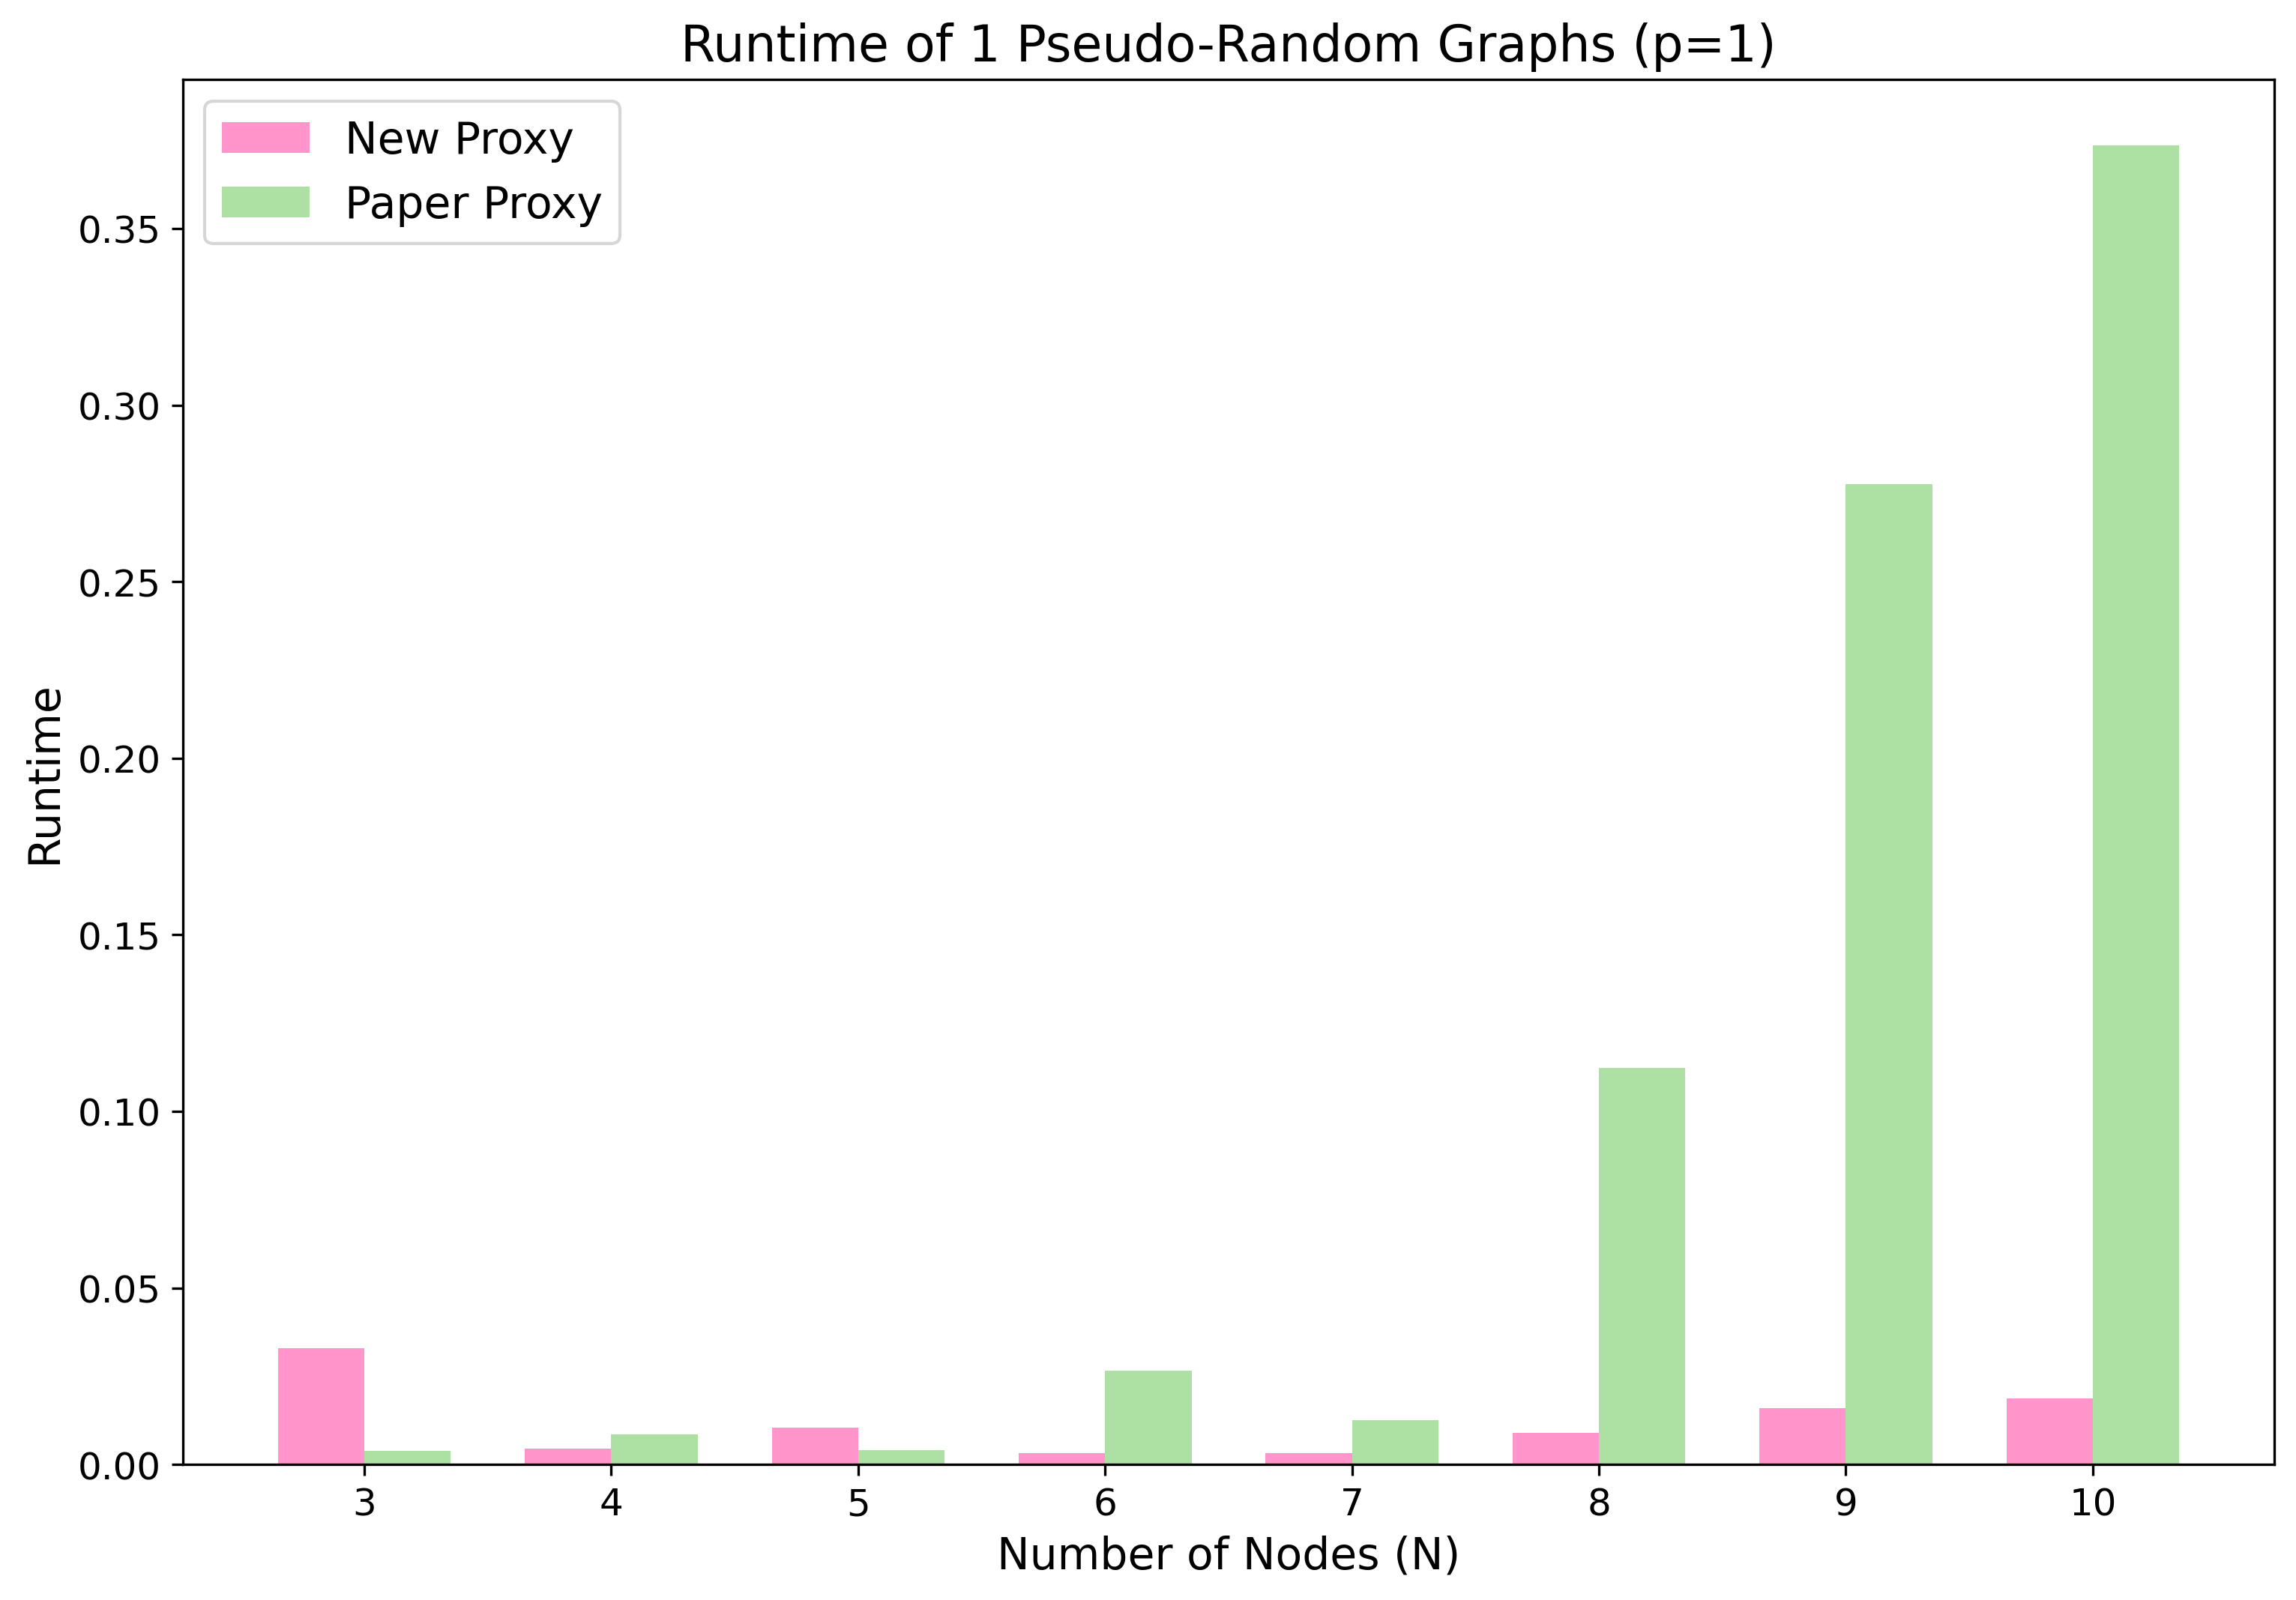

In [15]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import qokit.maxcut as mc
from QAOA_simulator import QAOA_run, get_simulator
import QAOA_proxy as qp
import QAOA_paper_proxy as qpp
import os  # データ保存に必要

# QAOAの層数
p = 1

runtime_new_proxy = []
runtime_paper_proxy = []

# 試行回数
T = 1

# 保存先ディレクトリを指定
save_dir = f"data_for_graphs_runtime_P={p}_T={T}"
os.makedirs(save_dir, exist_ok=True)

# Nを5から10まで変化させて計算
for N in range(3, 11):
    runtime_new_proxy_i = []
    runtime_paper_proxy_i = []

    for i in range(T):
        G = nx.erdos_renyi_graph(N, 0.5)
        ising_model = mc.get_maxcut_terms(G)
        sim = get_simulator(N, ising_model)

        init_gamma, init_beta = np.full((2, p), 0.1)

        result = qp.QAOA_proxy_run(G.number_of_edges(), N, p, init_gamma, init_beta)
        # `result` の中に `runtime` が存在するか確認
        if "runtime" in result:
            runtime = result["runtime"]
            # 結果をリストに追加
            runtime_new_proxy_i.append(runtime)
            print(f"New Proxy runtime for N={N}: {runtime}")
        else:
            print(f"Warning: 'runtime' not found for New Proxy with N={N}")

        np.save(f"{save_dir}/data_for_runtime_new_proxy_N={N}_G{i}.npy", runtime)

        result = qpp.QAOA_paper_proxy_run(G.number_of_edges(), N, p, init_gamma, init_beta)
        # `result` の中に `runtime` が存在するか確認
        if "runtime" in result:
            runtime = result["runtime"]
            # 結果をリストに追加
            runtime_paper_proxy_i.append(runtime)
            print(f"Paper Proxy runtime for N={N}: {runtime}")
        else:
            print(f"Warning: 'runtime' not found for Paper Proxy with N={N}")

        np.save(f"{save_dir}/data_for_runtime_paper_proxy_N={N}_G{i}.npy", runtime)

    # 各Nに対しての平均を計算
    if runtime_new_proxy_i:
        avg_runtime_new_proxy = np.mean(runtime_new_proxy_i)
        runtime_new_proxy.append(avg_runtime_new_proxy)
    if runtime_paper_proxy_i:
        avg_runtime_paper_proxy = np.mean(runtime_paper_proxy_i)
        runtime_paper_proxy.append(avg_runtime_paper_proxy)


# 棒グラフの作成
bar_width = 0.35  # バーの幅
index = np.arange(3, 11)  # x軸のインデックス

# runtime_new_proxy と runtime_paper_proxy のサイズが index のサイズと一致するように調整
if len(runtime_new_proxy) != len(index):
    runtime_new_proxy = runtime_new_proxy[:len(index)]
if len(runtime_paper_proxy) != len(index):
    runtime_paper_proxy = runtime_paper_proxy[:len(index)]

# グラフのサイズと解像度の設定（figsizeとdpiを調整）
plt.figure(figsize=(12, 8), dpi=300)

# 新しいプロキシの棒グラフ
plt.bar(index - bar_width / 2, runtime_new_proxy, bar_width, color='#FF69B4', alpha=0.7, label='New Proxy')

# 論文プロキシの棒グラフ
plt.bar(index + bar_width / 2, runtime_paper_proxy, bar_width, color='#8AD47D', alpha=0.7, label='Paper Proxy')

# グラフの設定
plt.xlabel('Number of Nodes (N)', fontsize=14)  # 横軸のラベル
plt.ylabel('Runtime', fontsize=14)  # 縦軸のラベル
plt.title(f'Runtime of {T} Pseudo-Random Graphs (p={p})', fontsize=16)  # 題名
plt.xticks(index, fontsize=12)  # x軸の目盛りのサイズ
plt.yticks(fontsize=12)  # y軸の目盛りのサイズ
plt.legend(prop={'size': 14})

# グラフをファイルとして保存
plt.savefig(f"{save_dir}/Runtime of {T} Pseudo-Random Graphs (P={p}).png", format='png', bbox_inches='tight')

# グラフの表示
plt.show()


     

New Proxy runtime for N=3: 0.08875560760498047
Paper Proxy runtime for N=3: 0.1956026554107666
New Proxy runtime for N=4: 0.10631847381591797
Paper Proxy runtime for N=4: 0.8594264984130859
New Proxy runtime for N=5: 0.14940786361694336
Paper Proxy runtime for N=5: 1.747154712677002
New Proxy runtime for N=6: 0.09428048133850098
Paper Proxy runtime for N=6: 1.9061744213104248
New Proxy runtime for N=7: 0.1936345100402832
Paper Proxy runtime for N=7: 3.6212947368621826
New Proxy runtime for N=8: 0.2849311828613281
Paper Proxy runtime for N=8: 16.427504539489746
New Proxy runtime for N=9: 0.7619953155517578
Paper Proxy runtime for N=9: 22.94204092025757
New Proxy runtime for N=10: 1.0211153030395508
Paper Proxy runtime for N=10: 23.260238885879517


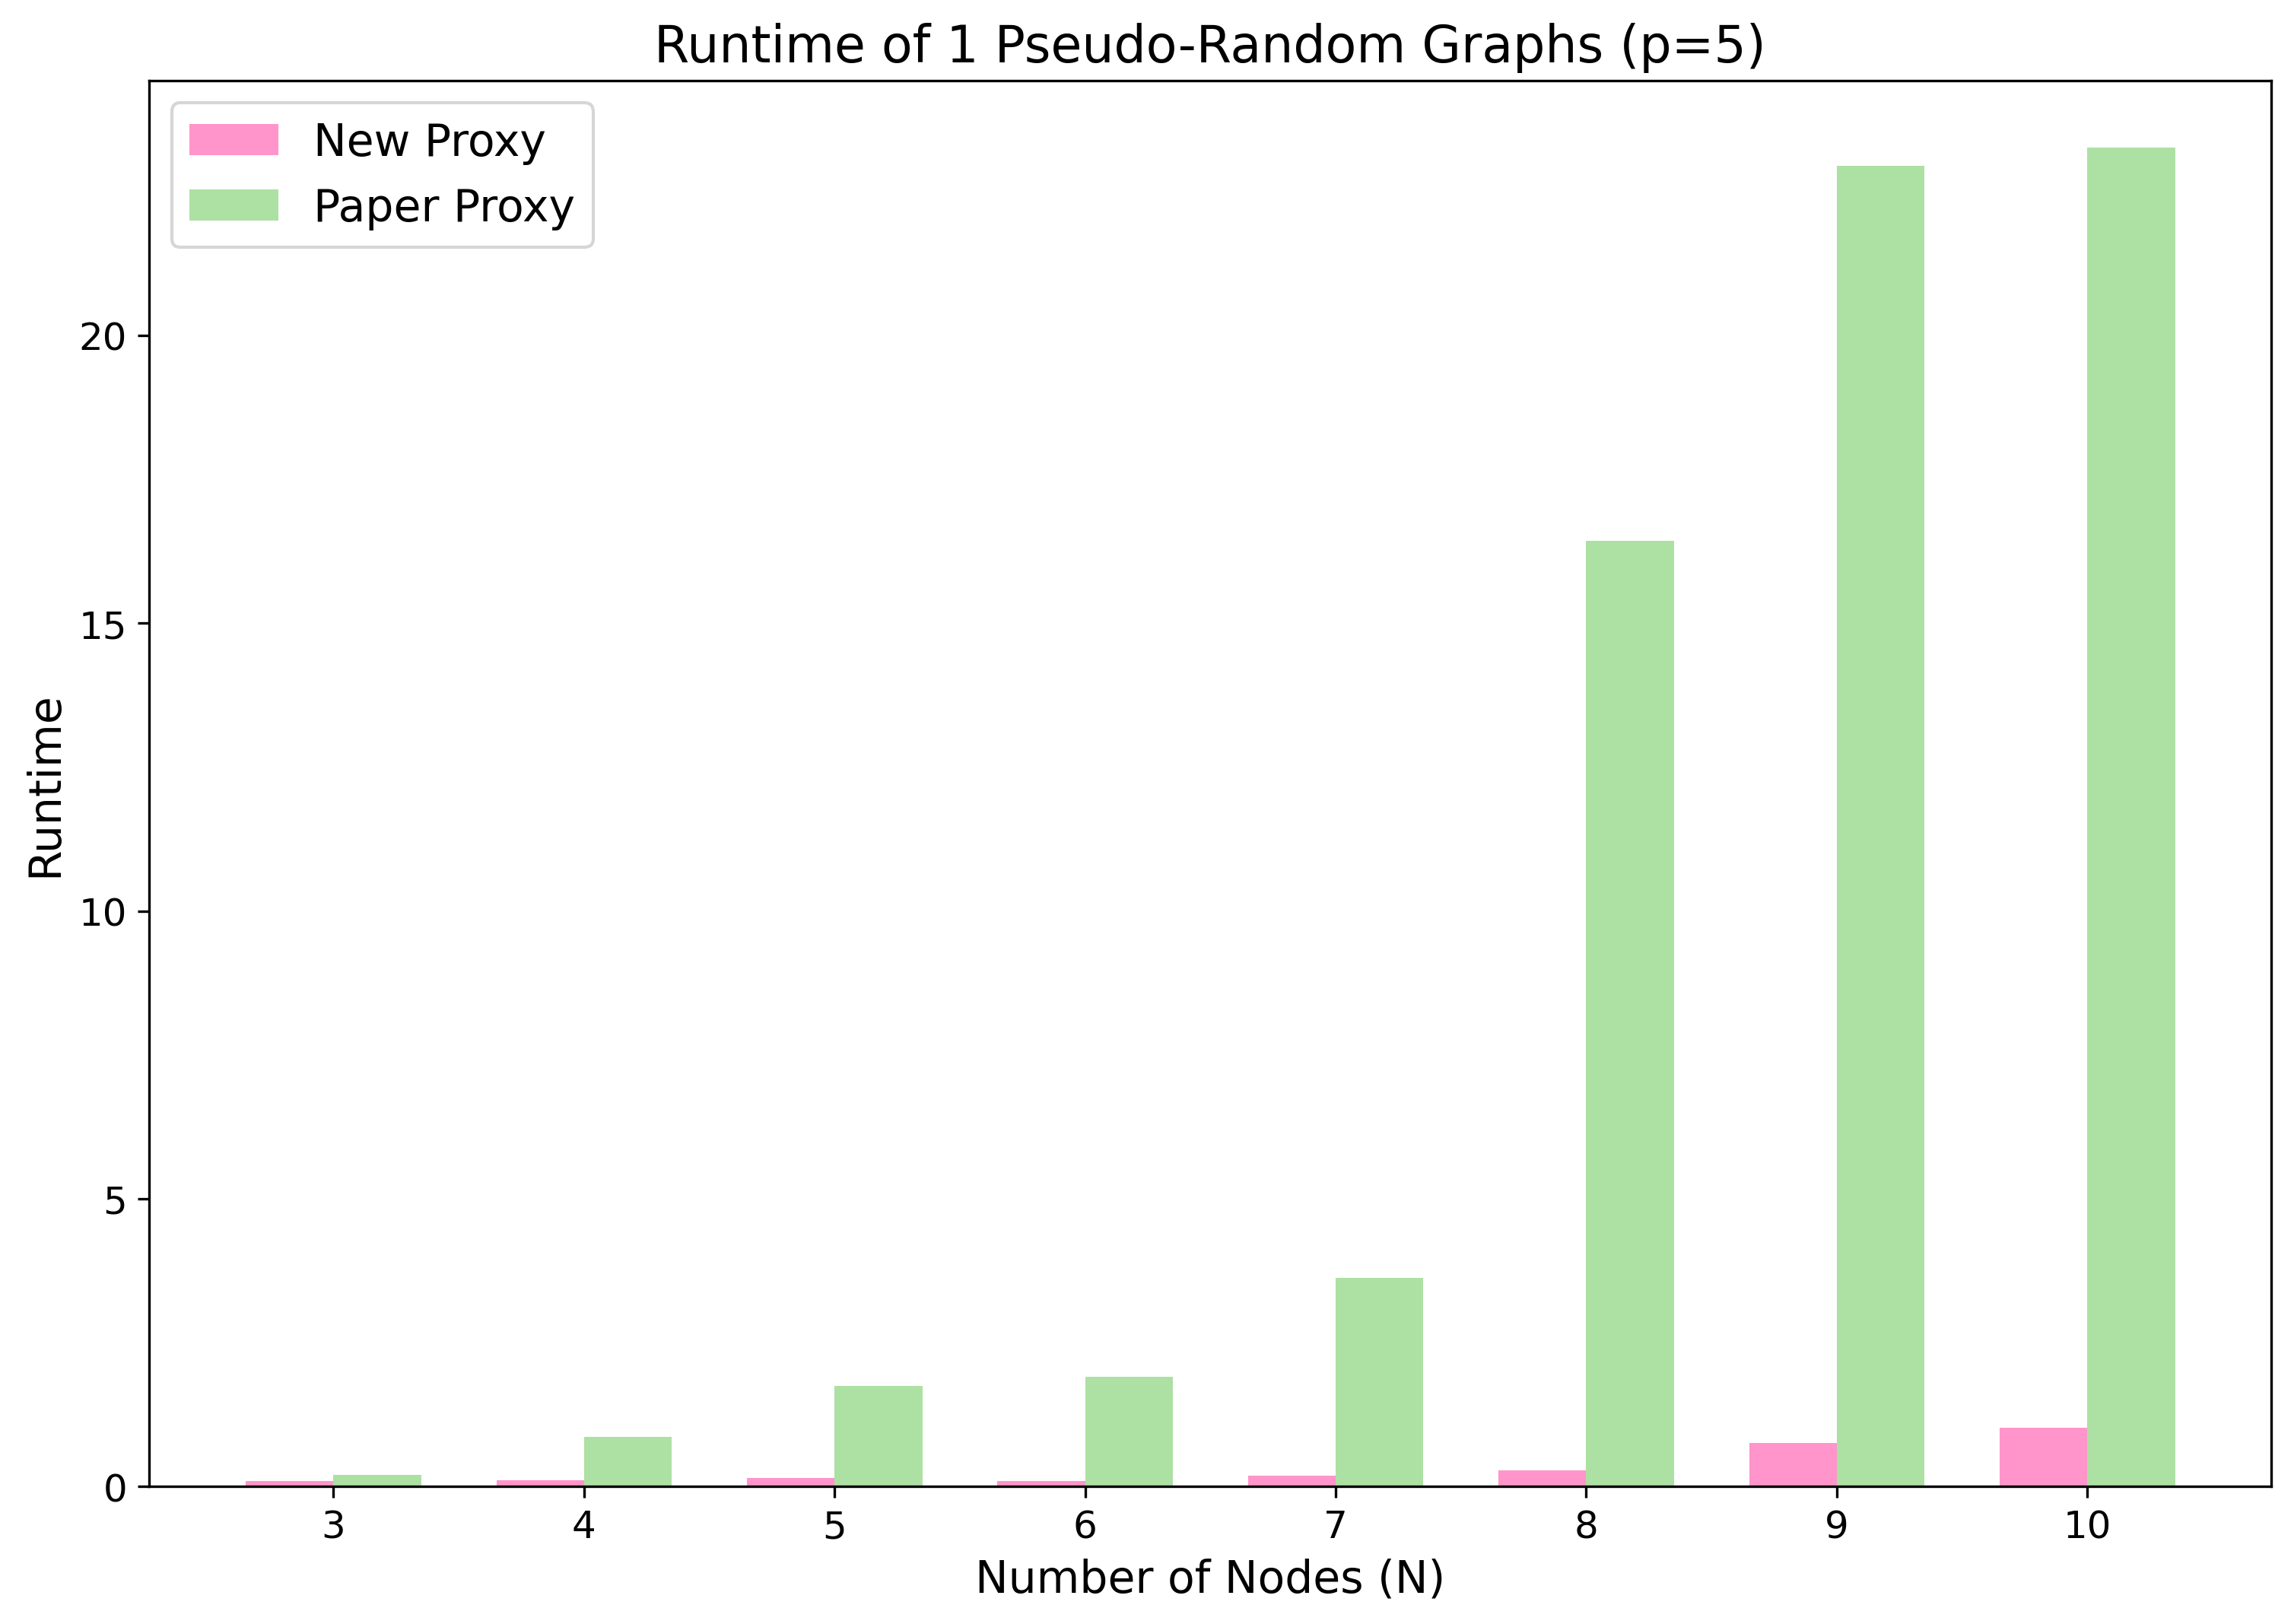

In [16]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import qokit.maxcut as mc
from QAOA_simulator import QAOA_run, get_simulator
import QAOA_proxy as qp
import QAOA_paper_proxy as qpp
import os  # データ保存に必要

# QAOAの層数
p = 5

runtime_new_proxy = []
runtime_paper_proxy = []

# 試行回数
T = 1

# 保存先ディレクトリを指定
save_dir = f"data_for_graphs_runtime_P={p}_T={T}"
os.makedirs(save_dir, exist_ok=True)

# Nを5から10まで変化させて計算
for N in range(3, 11):
    runtime_new_proxy_i = []
    runtime_paper_proxy_i = []

    for i in range(T):
        G = nx.erdos_renyi_graph(N, 0.5)
        ising_model = mc.get_maxcut_terms(G)
        sim = get_simulator(N, ising_model)

        init_gamma, init_beta = np.full((2, p), 0.1)

        result = qp.QAOA_proxy_run(G.number_of_edges(), N, p, init_gamma, init_beta)
        # `result` の中に `runtime` が存在するか確認
        if "runtime" in result:
            runtime = result["runtime"]
            # 結果をリストに追加
            runtime_new_proxy_i.append(runtime)
            print(f"New Proxy runtime for N={N}: {runtime}")
        else:
            print(f"Warning: 'runtime' not found for New Proxy with N={N}")

        np.save(f"{save_dir}/data_for_runtime_new_proxy_N={N}_G{i}.npy", runtime)

        result = qpp.QAOA_paper_proxy_run(G.number_of_edges(), N, p, init_gamma, init_beta)
        # `result` の中に `runtime` が存在するか確認
        if "runtime" in result:
            runtime = result["runtime"]
            # 結果をリストに追加
            runtime_paper_proxy_i.append(runtime)
            print(f"Paper Proxy runtime for N={N}: {runtime}")
        else:
            print(f"Warning: 'runtime' not found for Paper Proxy with N={N}")

        np.save(f"{save_dir}/data_for_runtime_paper_proxy_N={N}_G{i}.npy", runtime)

    # 各Nに対しての平均を計算
    if runtime_new_proxy_i:
        avg_runtime_new_proxy = np.mean(runtime_new_proxy_i)
        runtime_new_proxy.append(avg_runtime_new_proxy)
    if runtime_paper_proxy_i:
        avg_runtime_paper_proxy = np.mean(runtime_paper_proxy_i)
        runtime_paper_proxy.append(avg_runtime_paper_proxy)


# 棒グラフの作成
bar_width = 0.35  # バーの幅
index = np.arange(3, 11)  # x軸のインデックス

# runtime_new_proxy と runtime_paper_proxy のサイズが index のサイズと一致するように調整
if len(runtime_new_proxy) != len(index):
    runtime_new_proxy = runtime_new_proxy[:len(index)]
if len(runtime_paper_proxy) != len(index):
    runtime_paper_proxy = runtime_paper_proxy[:len(index)]

# グラフのサイズと解像度の設定（figsizeとdpiを調整）
plt.figure(figsize=(12, 8), dpi=300)

# 新しいプロキシの棒グラフ
plt.bar(index - bar_width / 2, runtime_new_proxy, bar_width, color='#FF69B4', alpha=0.7, label='New Proxy')

# 論文プロキシの棒グラフ
plt.bar(index + bar_width / 2, runtime_paper_proxy, bar_width, color='#8AD47D', alpha=0.7, label='Paper Proxy')

# グラフの設定
plt.xlabel('Number of Nodes (N)', fontsize=14)  # 横軸のラベル
plt.ylabel('Runtime', fontsize=14)  # 縦軸のラベル
plt.title(f'Runtime of {T} Pseudo-Random Graphs (p={p})', fontsize=16)  # 題名
plt.xticks(index, fontsize=12)  # x軸の目盛りのサイズ
plt.yticks(fontsize=12)  # y軸の目盛りのサイズ
plt.legend(prop={'size': 14})

# グラフをファイルとして保存
plt.savefig(f"{save_dir}/Runtime of {T} Pseudo-Random Graphs (P={p}).png", format='png', bbox_inches='tight')

# グラフの表示
plt.show()